## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Cleaned_Data Analytics Data Sheet.xlsx - Sheet1.csv")

In [3]:
data.head()

,Unnamed: 0,NAME,PHONE,Unnamed: 2,PRODUCTS,PRICE,DATE,FEEDBACK,Unnamed: 7
0,0,Leena,(844) 740-1826,+918447401826,"FACE PACK, SUNSCREEN, FACESCRUB",1800.0,27 November,product is good,lifestyle and heath tips
1,1,Neelu,(991) 008-4240,+919910084240,"FACE PACK, FACE SCRUB",1000.0,27 November,"PRODUCT ARE GOOD,WILL CHECK",lifestyle and heath tips
2,2,Poonam,(981) 135-6112,+919811356112,"BODY YOGURT, SUNSCREEN, LIP BALM",2000.0,27 November,good,lifestyle and heath tips
3,3,Deepa,(819) 594-0911,+918195940911,SUNSCREEN,600.0,27 November,not interested,lifestyle and heath tips
4,4,Suchita,(931) 053-9400,+919310539400,"FACE PACK, SCRUB, SUNSCREEN, BODY WASH, SUNSCREEN",3000.0,27 November,call cut,lifestyle and heath tips


## Analyze the distribution of key variables such as product prices and types of products purchased.

In [4]:
selected_columns = ['PRODUCTS', 'PRICE']
selected_data = data[selected_columns]

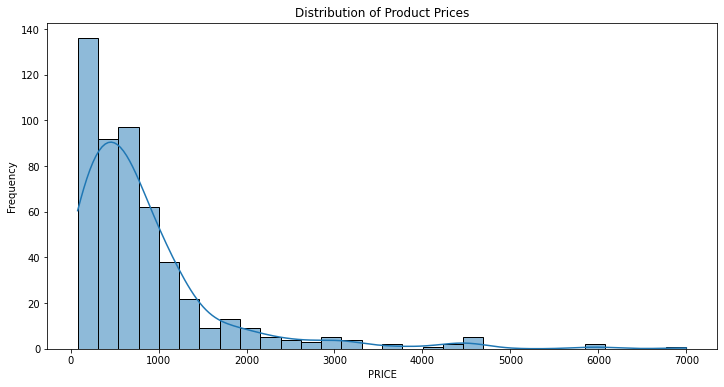

In [5]:
# Ploting the distribution of product prices
plt.figure(figsize=(12, 6))
sns.histplot(data=selected_data, x='PRICE', bins=30, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('PRICE')
plt.ylabel('Frequency')
plt.show()

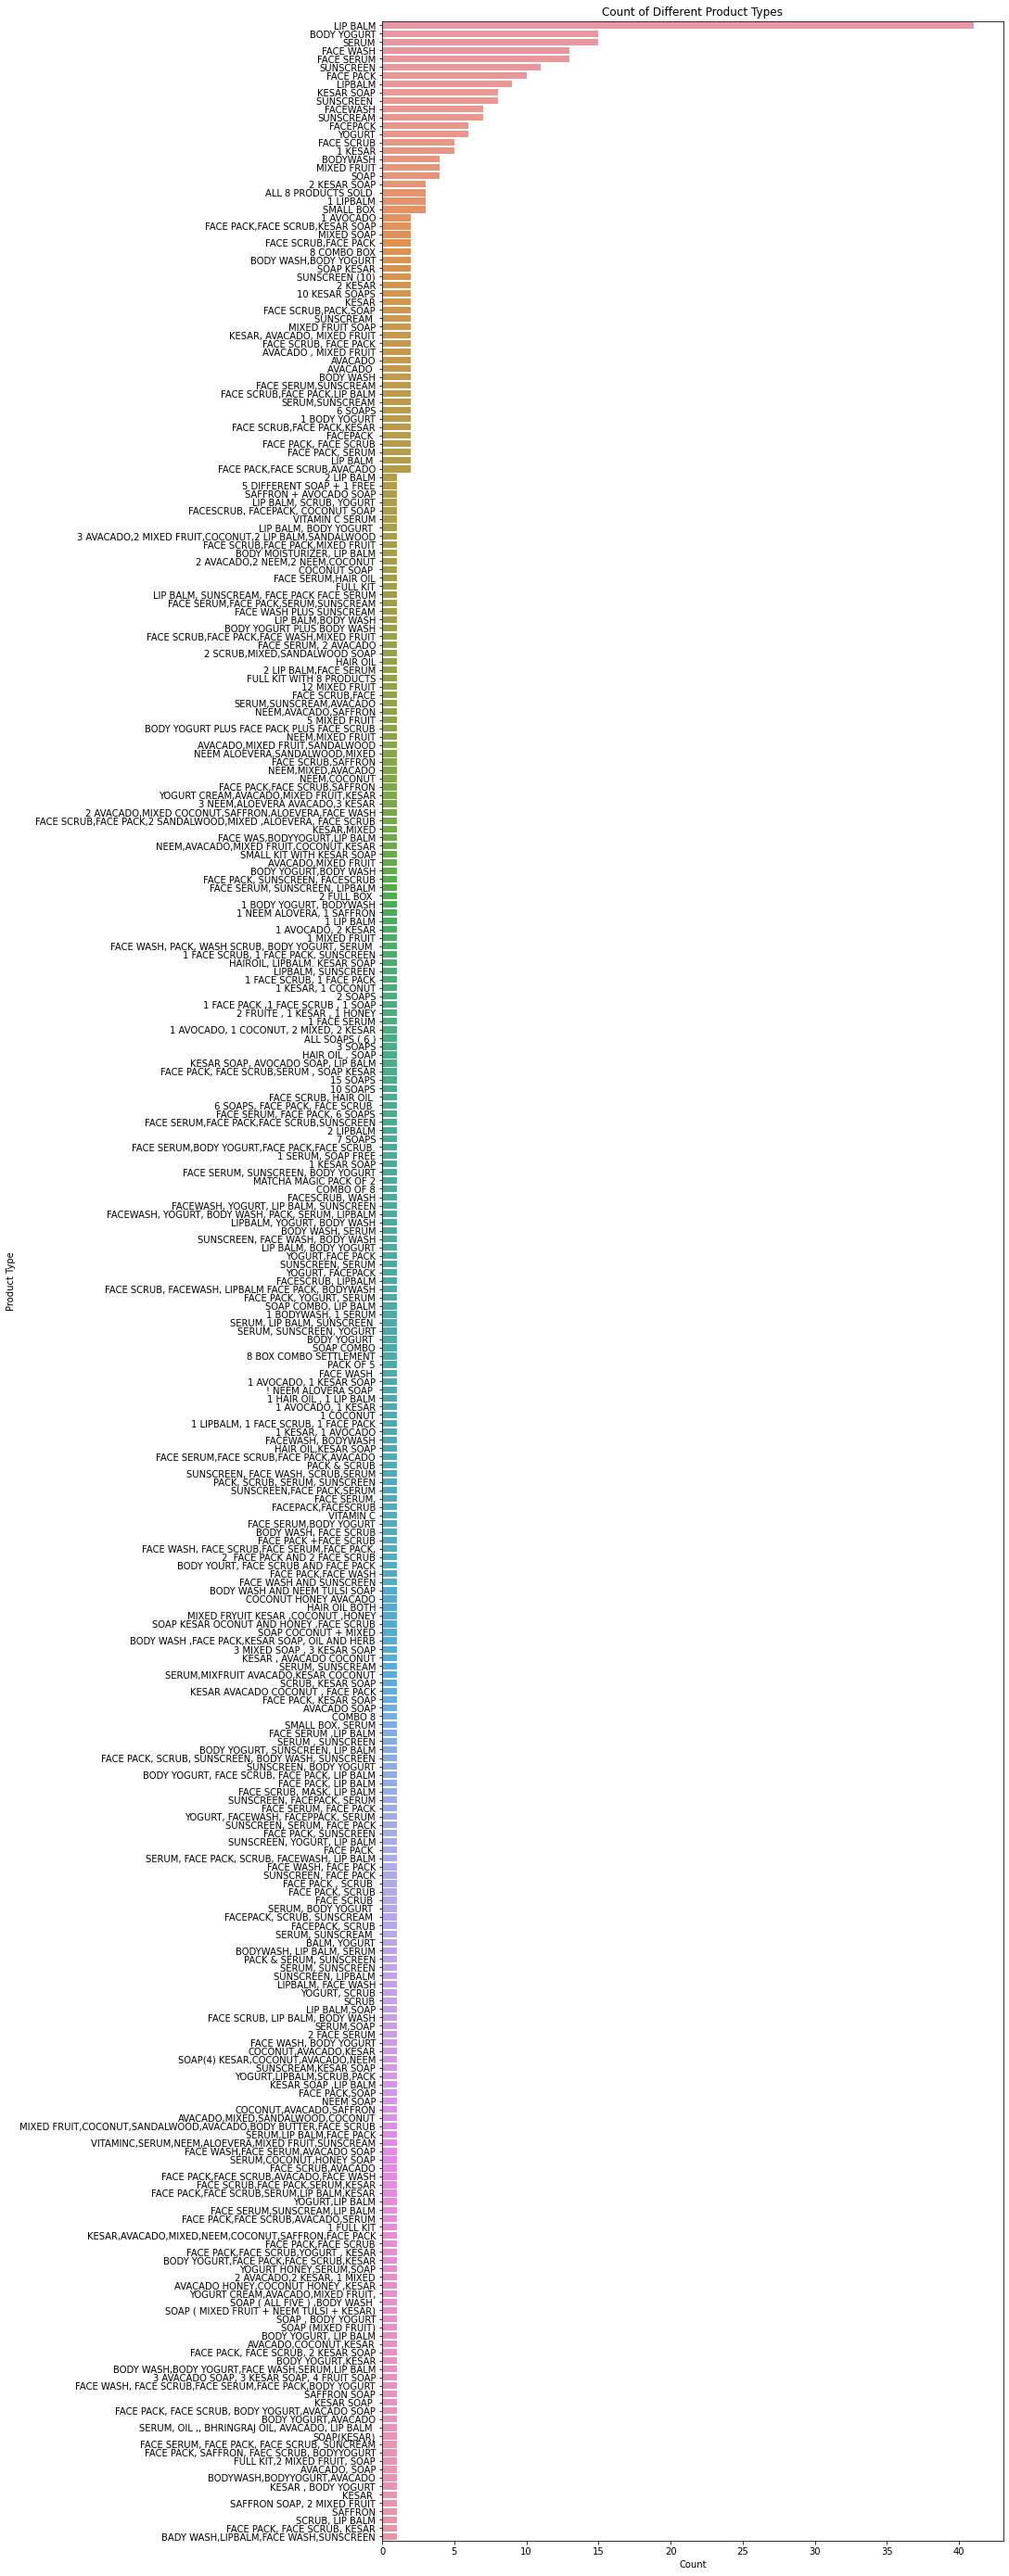

In [6]:
# Ploting the count of different product types
plt.figure(figsize=(12, 50))
sns.countplot(data=data, y='PRODUCTS', order=data['PRODUCTS'].value_counts().index)
plt.title('Count of Different Product Types')
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

## Identify patterns in purchase behaviors across different customer segments.

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


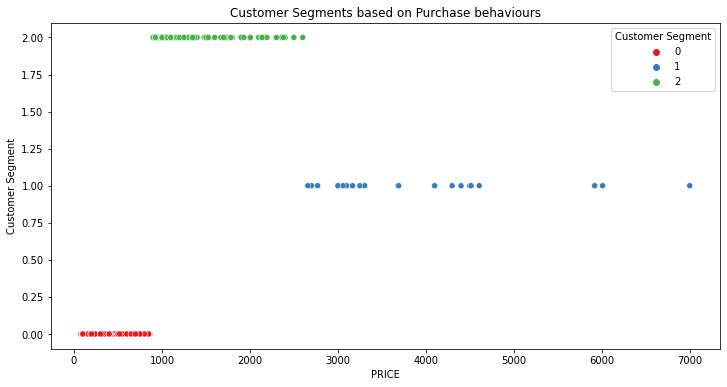

In [7]:
from sklearn.cluster import KMeans

# Choosing which columns to use
purchase_data = data[['PRODUCTS', 'PRICE']]

# Creating a numerical representation of the products using encoding
product_dummies = pd.get_dummies(purchase_data['PRODUCTS'], prefix='PRODUCTS')

# Combine numerical representation with other features
features = pd.concat([purchase_data['PRICE'], product_dummies], axis=1)

# Using K-Means clustering to create customer segments since column 'Customer segments' wasn't in the dataset
kmeans = KMeans(n_clusters=3, random_state=42)
data['Customer Segment'] = kmeans.fit_predict(features)

# Visualizing the clusters using scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PRICE', y='Customer Segment', data=data, hue='Customer Segment', palette='Set1')
plt.title('Customer Segments based on Purchase behaviours')
plt.show()

## Utilize visualizations (e.g., histograms, box plots) to explore data distributions and relationships.

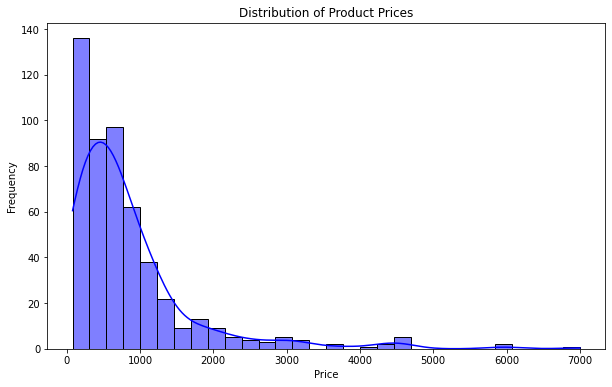

In [8]:
#Distribution of Product Prices
plt.figure(figsize=(10, 6))
sns.histplot(data['PRICE'], bins=30, kde=True, color='blue')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

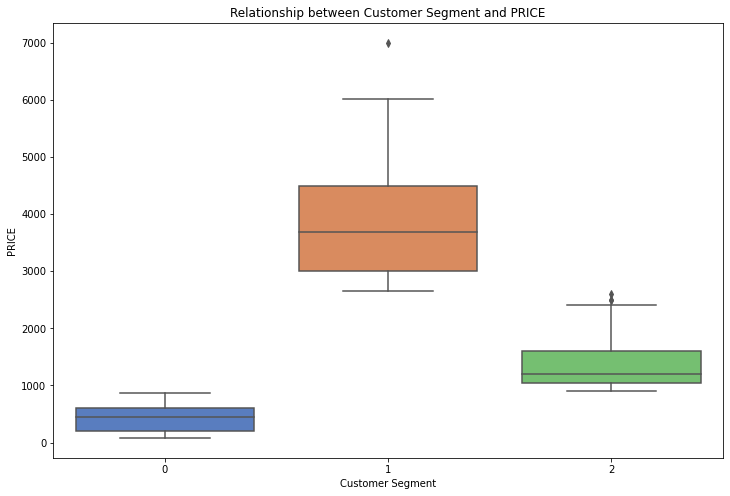

In [9]:
#Relationship between Customer Segment and Purchase Amount
plt.figure(figsize=(12, 8))
sns.boxplot(x='Customer Segment', y='PRICE', data=data, palette='muted')
plt.title('Relationship between Customer Segment and PRICE')
plt.xlabel('Customer Segment')
plt.ylabel('PRICE')
plt.show()

## Detect outliers and anomalies that may impact analysis and subsequent modeling.

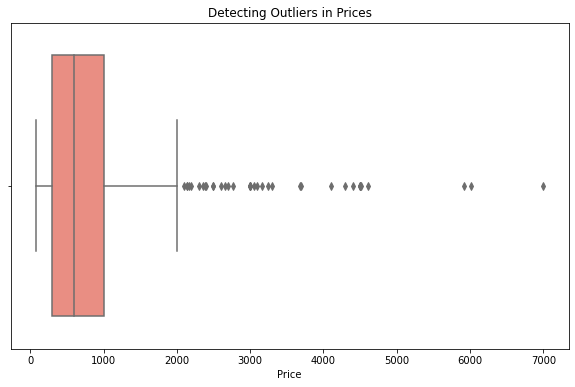

In [33]:
#Detecting Outliers in Product Prices using Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['PRICE'], color='salmon')
plt.title('Detecting Outliers in Prices')
plt.xlabel('Price')
plt.show()